In [5]:
#loading all the library. 

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.cluster import KMeans
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import google.datalab.storage as storage
import pandas as pd
from io import BytesIO
import google.datalab.storage as storage

# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [39]:
# Reading the data on google cloud storage.

!gsutil cp 'gs://sales_new_storage/sales.csv' ./

Copying gs://sales_new_storage/sales.csv...
/ [1 files][  4.2 KiB/  4.2 KiB]                                                
Operation completed over 1 objects/4.2 KiB.                                      


In [24]:
#viewing the datasets as csv file

df = pd.read_csv('sales.csv') 
df.head(10)

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [8]:
#Making sure that all the data is cleaned and checking the null value too!

df.isnull().any().any()

False

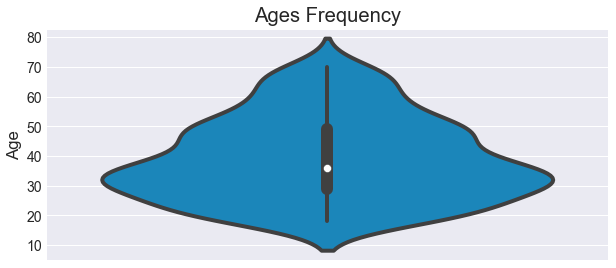

In [25]:
# Droped the first column data as its not required on the creating clystering model.

df.drop(["CustomerID"], axis = 1, inplace=True)
plt.figure(figsize=(9,4))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

# looking the age graph to understand what are the age group has provided the sale data

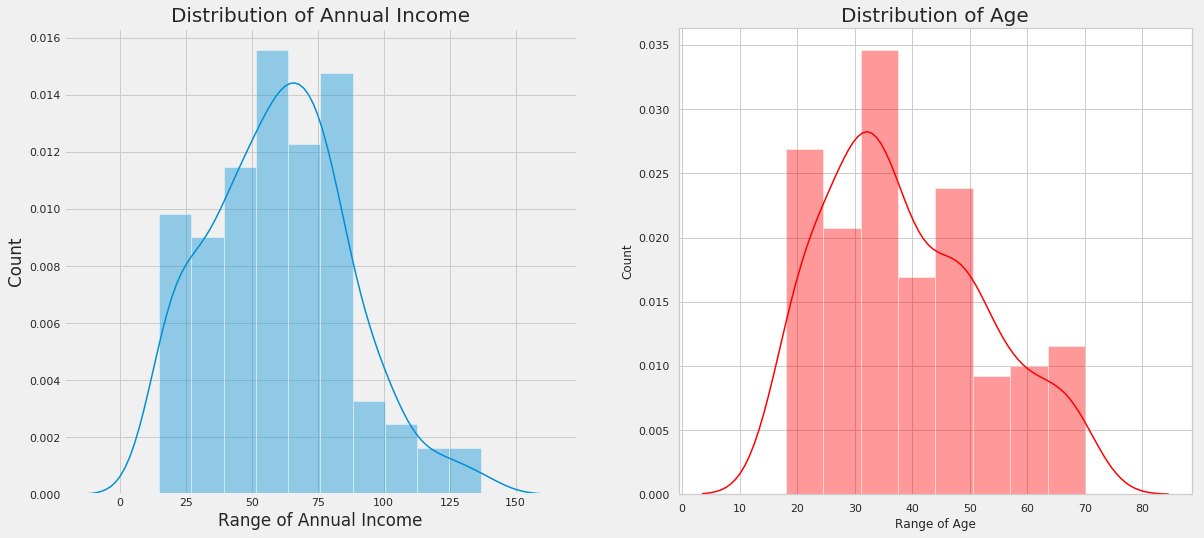

In [43]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Income'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

In [22]:
# Here, In the above Plots we can see the Distribution pattern of Annual Income and Age, By looking at the plots,
# we can infer one thing that There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. 
#Also, we can say that the least Income is around 20 US Dollars.
#Taking inferences about the Customers.
#The most regular customers for the sales group has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent buyers. Youngsters are lesser in number as compared to the Middle aged people.

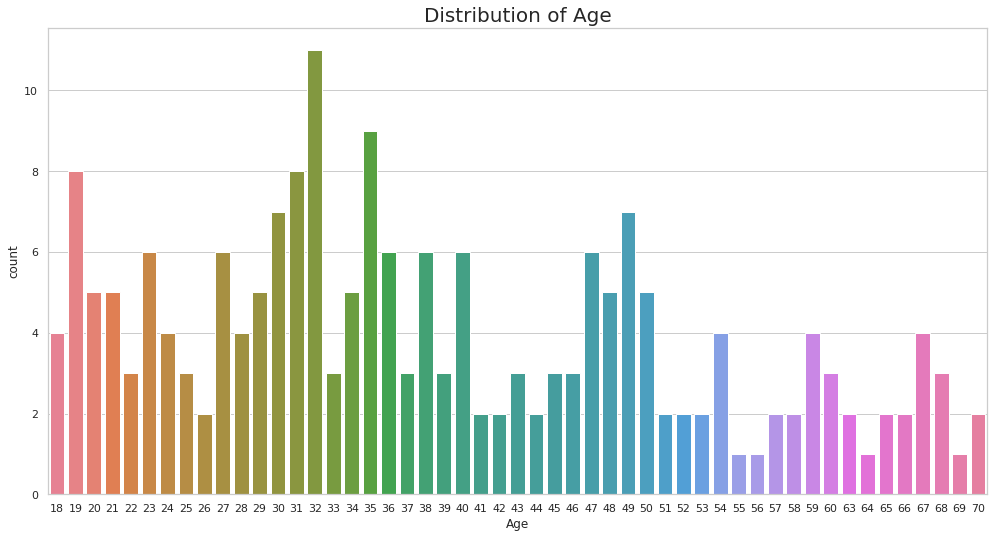

In [44]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age'], palette = 'husl')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

In [ ]:
#By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. Interesting Fact, There are equal no. of head count for the Age 18 and 67 and Age from 55, 56, 69, 64 are very less frequent in the sales. People at Age 32 are the Most Frequent buyer.

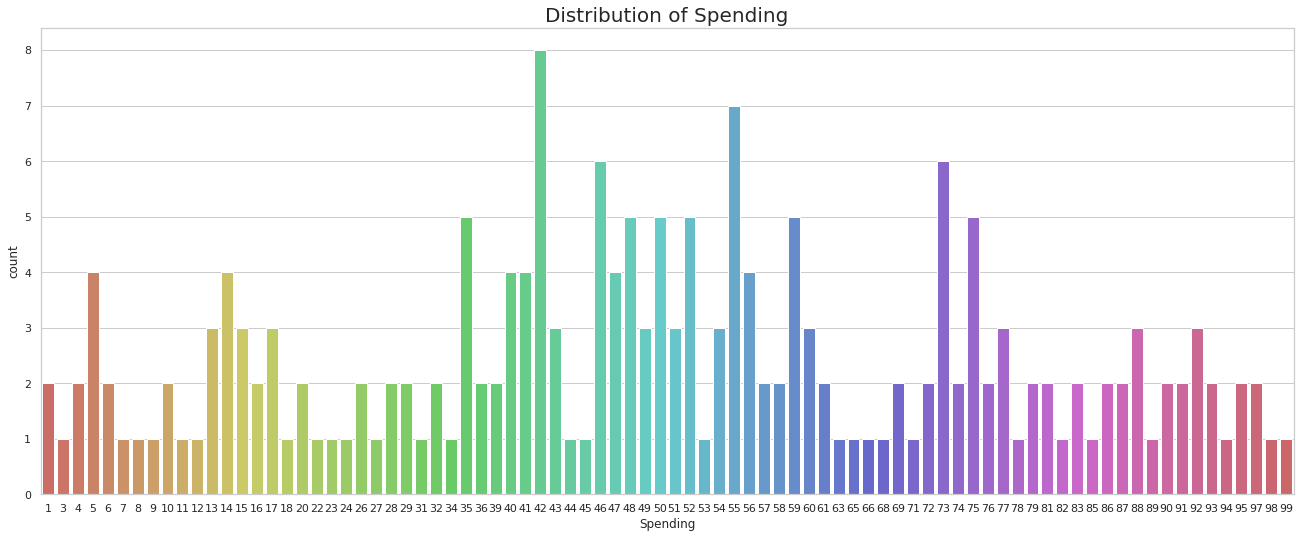

In [45]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['Spending'], palette = 'hls')
plt.title('Distribution of Spending', fontsize = 20)
plt.show()

In [ ]:
#On a general level, we may conclude that most of the Customers have their Spending in the range of 35-60. Interesting there are customers who's having spending 1 and 99, Which shows that the it has sales is occuring for each range of products.

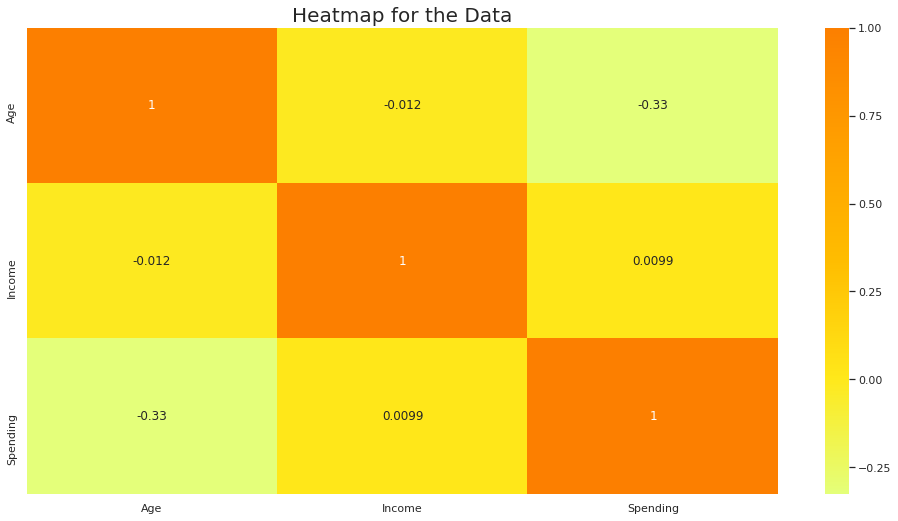

In [46]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

# The below figure shows the correlation between Age, Income and spending. Where, most correlated features is shown in orage colour and least correlated feature is showned in orange colour.

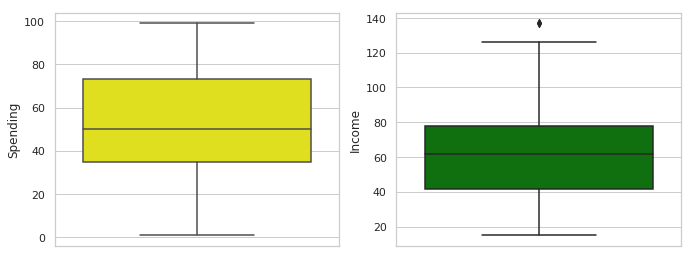

In [47]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending"], color="yellow")
plt.subplot(1,2,2)
sns.boxplot(y=df["Income"], color = "green")
plt.show()

#looking at the ratio of Spending and Incoming average value to understand the maximum and minmum fig.

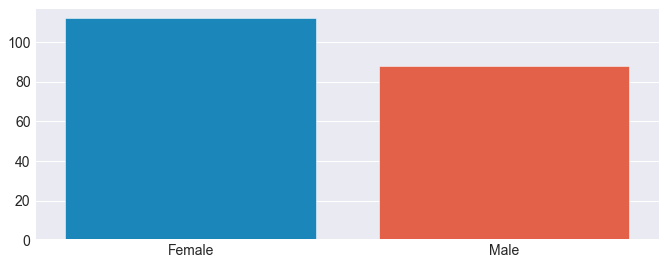

In [26]:
genders = df.Gender.value_counts()

df = df.replace({'Gender':{ "Male":0, "Female":1}})

#df.drop(["Gender"], axis = 1, inplace=True)
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

# finding the gender ratio for the sales target audience with specific marketing based on their expence and income


In [68]:
df.head(5)

,Gender,Age,Income,Spending
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


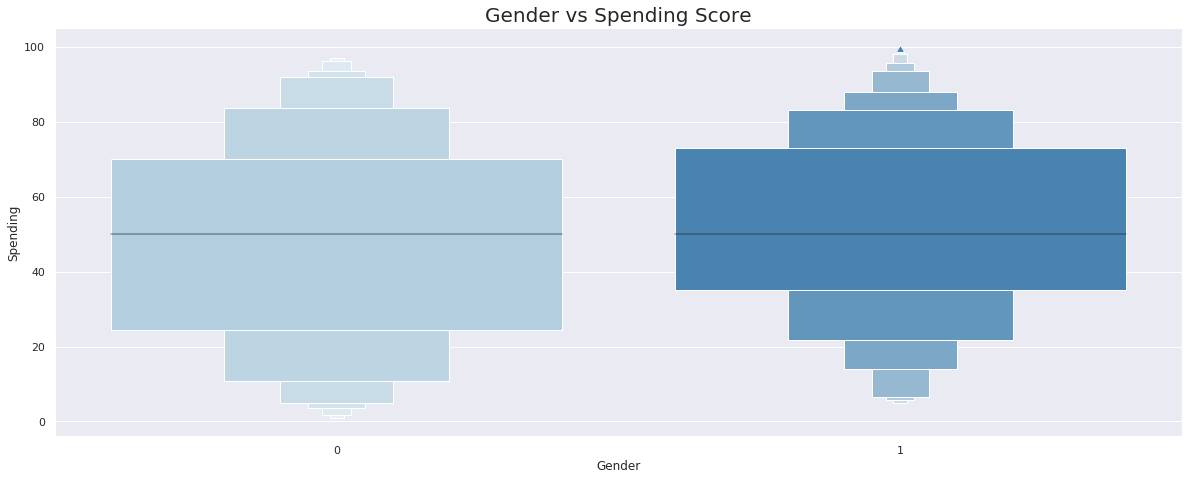

In [49]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(df['Gender'], df['Spending'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

#It is clearly visible that the most of the males have a Spending of around 25k US Dollars to 70k US Dollars whereas the Females have a spending is around 35k US Dollars to 75k US Dollars. which again points to the fact that women are Shopping Leaders.

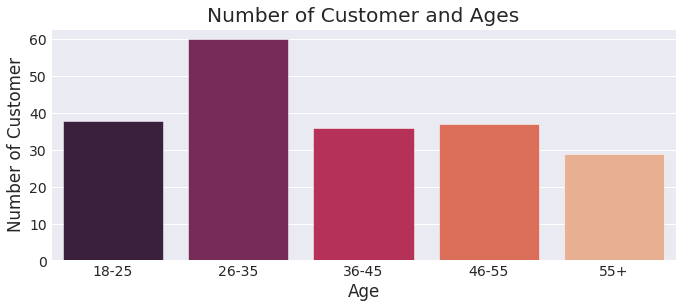

In [53]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(10,4))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

# this Char would help us to understand the number audience need to target for the marking campaign and other sale promotion activity 
# For eg. - here the youngest age group has very high number who does the regular shopping.


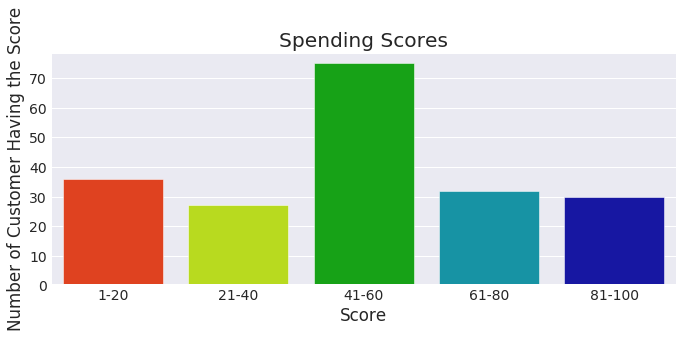

In [54]:
ss1_20 = df["Spending"][(df["Spending"] >= 1) & (df["Spending"] <= 20)]
ss21_40 = df["Spending"][(df["Spending"] >= 21) & (df["Spending"] <= 40)]
ss41_60 = df["Spending"][(df["Spending"] >= 41) & (df["Spending"] <= 60)]
ss61_80 = df["Spending"][(df["Spending"] >= 61) & (df["Spending"] <= 80)]
ss81_100 = df["Spending"][(df["Spending"] >= 81) & (df["Spending"] <= 100)]
ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,4))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

# This graph would help us to understand how much average spending , maximum and minumum does under 5 category of audience

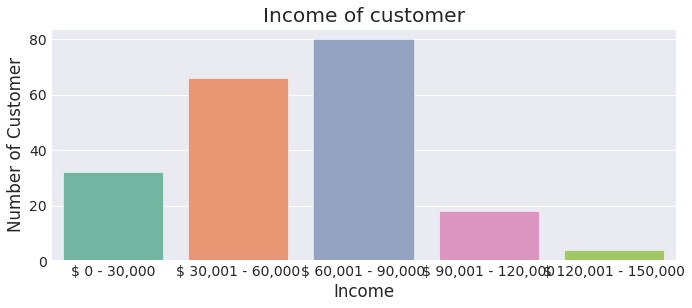

In [55]:
ai0_30 = df["Income"][(df["Income"] >= 0) & (df["Income"] <= 30)]
ai31_60 = df["Income"][(df["Income"] >= 31) & (df["Income"] <= 60)]
ai61_90 = df["Income"][(df["Income"] >= 61) & (df["Income"] <= 90)]
ai91_120 = df["Income"][(df["Income"] >= 91) & (df["Income"] <= 120)]
ai121_150 = df["Income"][(df["Income"] >= 121) & (df["Income"] <= 150)]
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]
plt.figure(figsize=(10,4))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Income of customer")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

# This graph is help us to understand the highest income ratio of the customer to target the product pricing or sale optimization 

In [69]:
df.head(3)

,Gender,Age,Income,Spending
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6


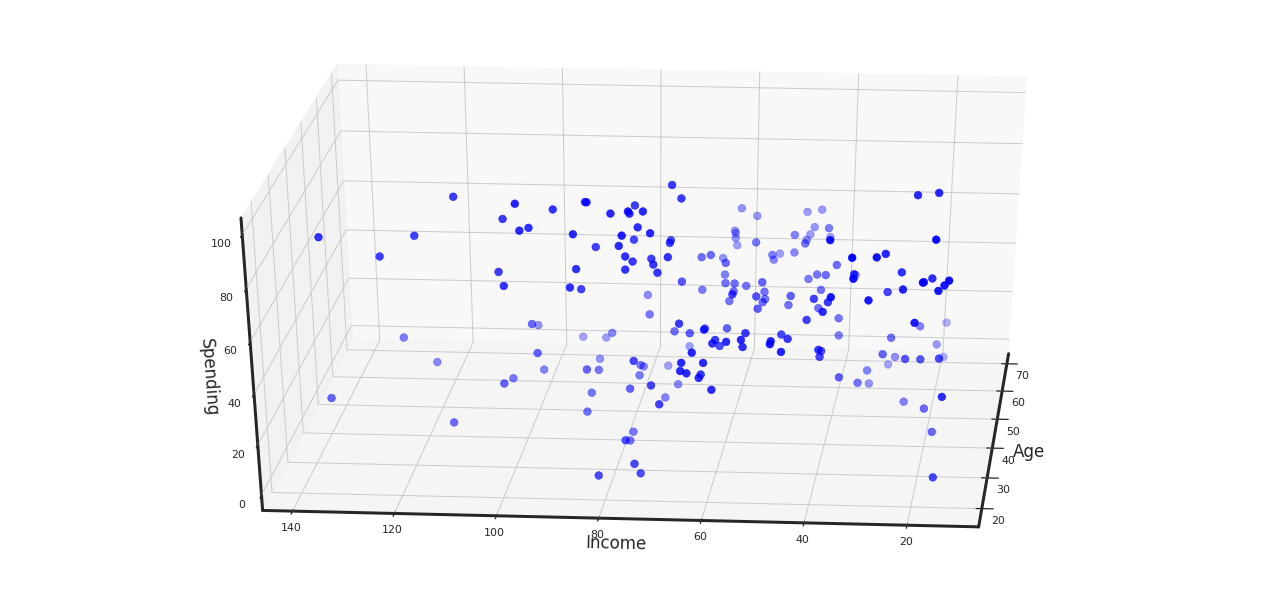

In [70]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Income"], df["Spending"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel('Spending')
plt.show()

# All set of data points on the spending, income and Age group.


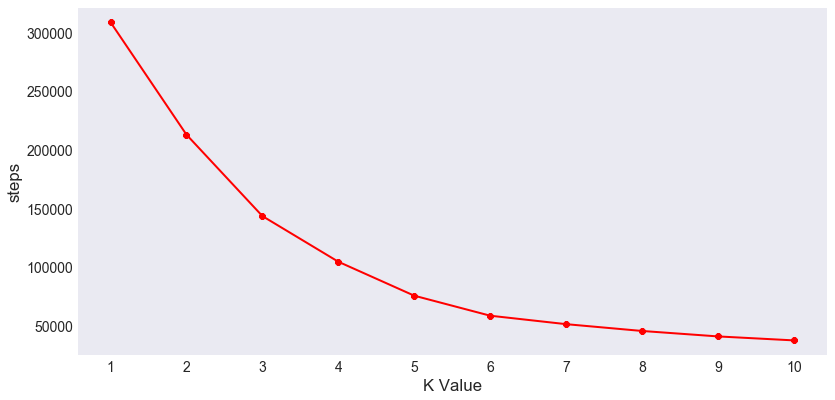

In [27]:
tester = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    tester.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),tester, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("steps")
plt.show()

#selection process for the KMeans clustering group.

In [84]:
df.head(3)

,Gender,Age,Income,Spending
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6


In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

km = KMeans(n_clusters=5)
clusters = km.fit_predict(df)
df["label"] = clusters

In [20]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

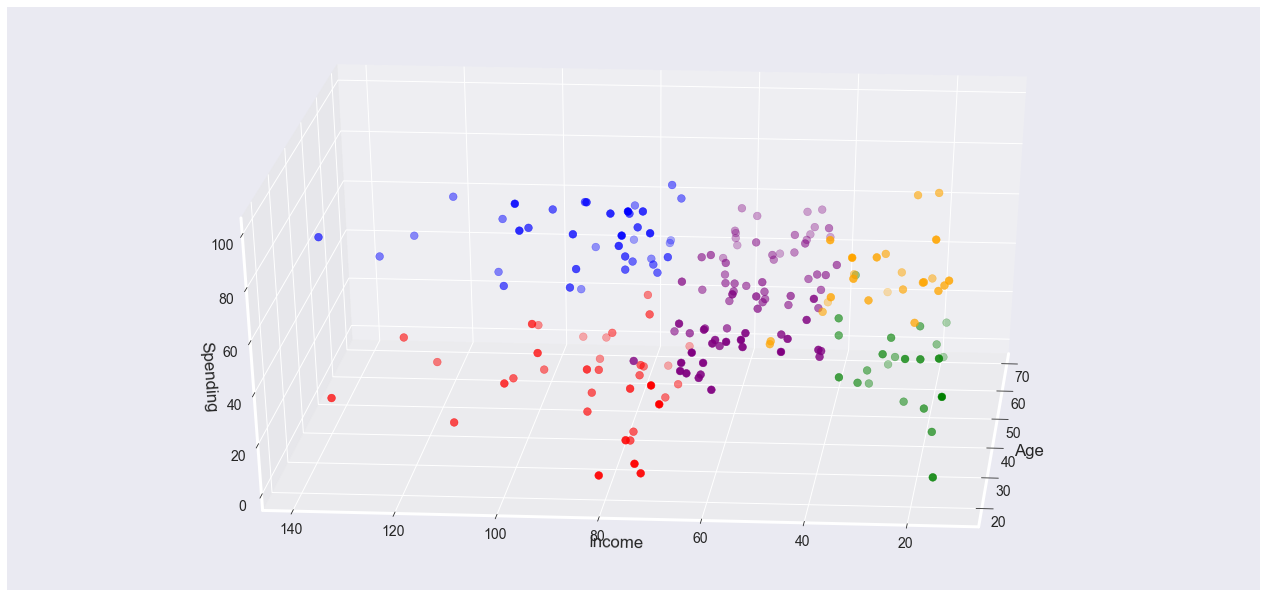

In [29]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Income"][df.label == 0], df["Spending"][df.label == 0], c='blue', s=60) # Senior Employee
ax.scatter(df.Age[df.label == 1], df["Income"][df.label == 1], df["Spending"][df.label == 1], c='red', s=60) # Employee
ax.scatter(df.Age[df.label == 2], df["Income"][df.label == 2], df["Spending"][df.label == 2], c='green', s=60) # Students
ax.scatter(df.Age[df.label == 3], df["Income"][df.label == 3], df["Spending"][df.label == 3], c='orange', s=60) # Retired
ax.scatter(df.Age[df.label == 4], df["Income"][df.label == 4], df["Spending"][df.label == 4], c='purple', s=60) # Investors
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel('Spending')
plt.show()


# Creating a clustering based on five group of audience.
# where as per model output is followed group.
#"0 - Working class", "1-Students" , "2 - Wealthy class" , "3- Economical class" , "4- Frequent buyer"

df = df.replace({'label':{ 0:"Working class", 1:"Students" , 2: "wealthy class",3:"Economical class", 4:"Frequent buyer"}})



In [22]:
labels = km.labels_

df['label'] =  clusters
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending'],
    z= df['Income'],
    mode='markers',
     marker=dict(
        color = df['label'], 
        size= 10,
        line=dict(
            color= df['label'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending'),
            zaxis = dict(title  = 'Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import pickle

# km = KMeans(n_clusters=5)
# clusters = km.fit_predict(df.iloc[:,1:])
# df["label"] = clusters

#df = df.replace({'label':{ 0:"Working class", 1:"Students" , 2: "wealthy class",3:"Economical class", 4:"Frequent buyer"}})

# import joblib
# joblib.dump(km, 'model.joblib')





In [ ]:
df.head(5)
# Final Clustering group based on Gender, Age , Income and Spending 

In [80]:


with open('model.pkl', 'wb') as model_file:
  pickle.dump(km, model_file)

In [ ]:
df.to_csv('results1.csv', index = False)
!gsutil cp -n 'results1.csv' 'gs://sales_new_storage/'

In [81]:
!gsutil cp ./model.pkl gs://sales_data_123/model.pkl

Copying file://./model.pkl [Content-Type=application/octet-stream]...
/ [1 files][  1.6 KiB/  1.6 KiB]                                                
Operation completed over 1 objects/1.6 KiB.                                      
